In [6]:
# Phase 5 - Final Report & Dashboard
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the featured data with the correct datetime column name
df = pd.read_csv('/kaggle/input/02-feature-engineering-caiso-renewables/CAISO_Renewables_Featured.csv', parse_dates=['DateTime'])
df.set_index('DateTime', inplace=True)

# Calculate total renewables by summing the individual renewable sources
renewable_cols = ['Solar', 'Wind', 'Geothermal', 'Biomass', 'Small hydro']
df['total_renewables_calc'] = df[renewable_cols].sum(axis=1)

# Load the XGBoost prediction file you saved
xgb_preds = pd.read_csv('/kaggle/input/xgboost-forecast-csv/xgboost_forecast.csv', parse_dates=['DateTime'])
xgb_preds.set_index('DateTime', inplace=True)

# Merge actual and predicted
df_forecast = df[['total_renewables_calc']].copy()
df_forecast = df_forecast.merge(xgb_preds, left_index=True, right_index=True)

print(df_forecast.head())

                     total_renewables_calc  XGBoost_Forecast
DateTime                                                    
2022-08-02 00:00:00                 4174.0        -24.444326
2022-08-02 01:00:00                 4169.0        -24.612757
2022-08-02 02:00:00                 3904.0        -24.612757
2022-08-02 03:00:00                 3870.0        -24.612757
2022-08-02 04:00:00                 3505.0        -24.612757


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df_forecast.index, df_forecast['total_renewables_calc'], label='Actual', color='blue')
plt.plot(df_forecast.index, df_forecast['XGBoost_Forecast'], label='XGBoost Forecast', color='orange')
plt.title("XGBoost Forecast vs Actual - CAISO Renewables")
plt.xlabel("Date")
plt.ylabel("Renewable Energy (MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_forecast.index, y=df_forecast['total_renewables_calc'],
                         mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=df_forecast.index, y=df_forecast['XGBoost_Forecast'],
                         mode='lines', name='XGBoost Forecast'))
fig.update_layout(title='XGBoost Forecast vs Actual (Interactive)',
                  xaxis_title='Date',
                  yaxis_title='Renewables (MWh)')
fig.show()

In [12]:
# Assuming you've already saved these from Phase 4
model_scores = pd.DataFrame({
    'Model': ['Naive', 'Prophet', 'XGBoost'],
    'MAE': [5195.42, 1305.26, 810.89],
    'RMSE': [7622.27, 1599.31, 1247.14]
})

fig = px.bar(model_scores, x='Model', y='RMSE', title='Model RMSE Comparison',
             text_auto=True, color='Model', color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()


In [ ]:
#Summary

- **Dataset**: CAISO Renewable Energy (2021–2022)
- **Objective**: Forecast renewable energy generation accurately using various models.
- **Best Model**: XGBoost (MAE: 810.89, RMSE: 1247.14)
- **Insight**:
    - XGBoost performed significantly better than both Prophet and Naive models.
    - Accurate modeling of renewable generation can help in grid load planning and resource allocation.


In [15]:
df_forecast['difference'] = df_forecast['total_renewables_calc'] - df_forecast['XGBoost_Forecast']

print(df_forecast[['total_renewables_calc', 'XGBoost_Forecast', 'difference']].tail(7*24))

                     total_renewables_calc  XGBoost_Forecast   difference
DateTime                                                                 
2022-08-25 00:00:00                 3684.0       -114.419220  3798.419220
2022-08-25 01:00:00                 3200.0       -114.587660  3314.587660
2022-08-25 02:00:00                 3205.0       -114.587660  3319.587660
2022-08-25 03:00:00                 3044.0       -114.587660  3158.587660
2022-08-25 04:00:00                 2753.0       -114.587660  2867.587660
...                                    ...               ...          ...
2022-08-31 19:00:00                 4691.0       2160.044400  2530.955600
2022-08-31 20:00:00                 4236.0         65.174995  4170.825005
2022-08-31 21:00:00                 4168.0         36.236465  4131.763535
2022-08-31 22:00:00                 4092.0         28.150167  4063.849833
2022-08-31 23:00:00                 3896.0         20.133429  3875.866571

[168 rows x 3 columns]


In [16]:
print(df_forecast['difference'].tail(7*24).describe())

count     168.000000
mean     4413.826099
std      1102.165036
min      1935.569600
25%      3573.533734
50%      4482.119500
75%      5177.754500
max      7752.634000
Name: difference, dtype: float64


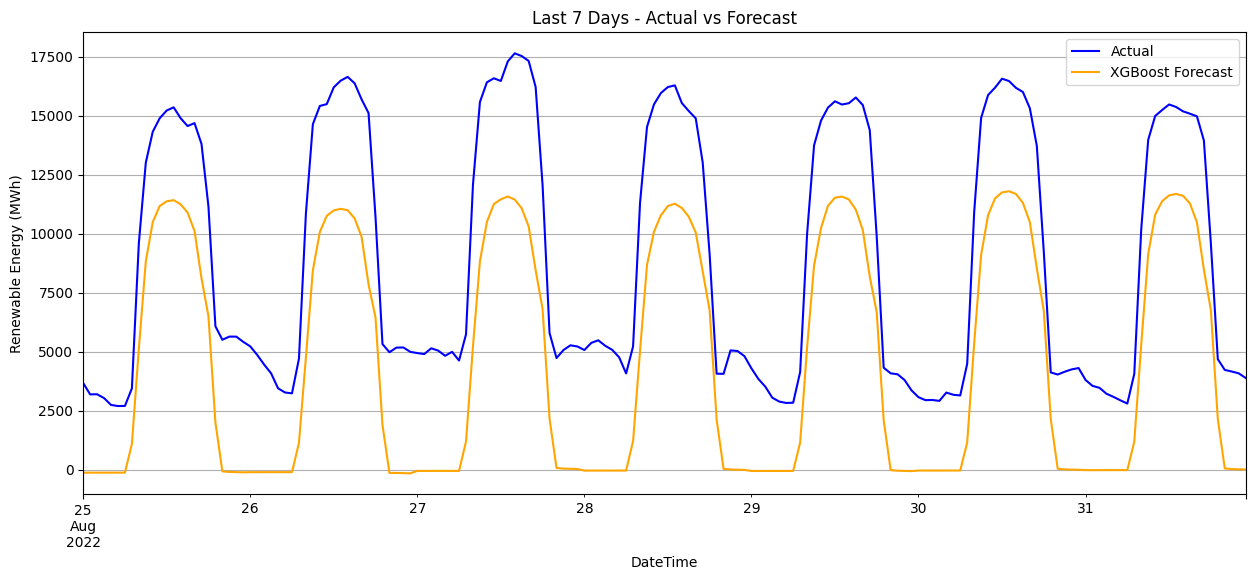

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
df_forecast[-7*24:]['total_renewables_calc'].plot(label="Actual", color='blue')
df_forecast[-7*24:]['XGBoost_Forecast'].plot(label="XGBoost Forecast", color='orange')
plt.title("Last 7 Days - Actual vs Forecast")
plt.xlabel("DateTime")  # It's good practice to label the x-axis
plt.ylabel("Renewable Energy (MWh)") # And the y-axis
plt.legend()
plt.grid(True)
plt.show()

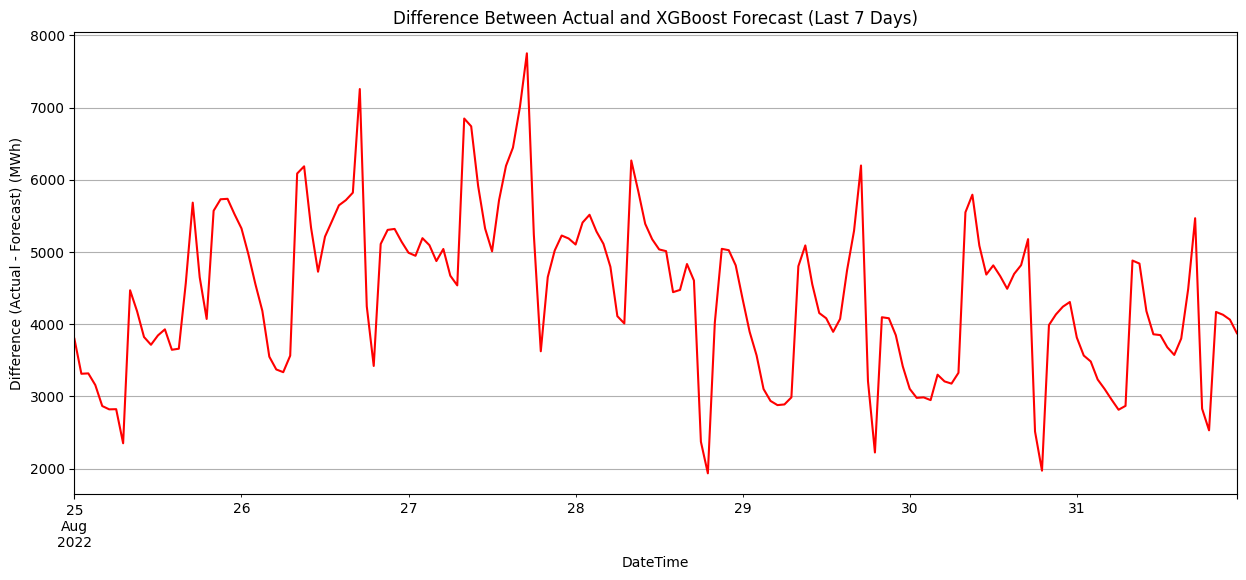

In [21]:
plt.figure(figsize=(15, 6))
df_forecast[-7*24:]['difference'].plot(color='red')
plt.title("Difference Between Actual and XGBoost Forecast (Last 7 Days)")
plt.xlabel("DateTime")
plt.ylabel("Difference (Actual - Forecast) (MWh)")
plt.grid(True)
plt.show()